In [18]:
# 导入基本的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

In [35]:
# 设置绘图风格
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [23]:
# 深度学习
from tensorflow.python.keras.layers.core  import Dense, Activation, Dropout
from tensorflow.python.keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras import optimizers

In [54]:
stock_data = pd.read_csv("./combined_stock_data.csv")
stock_data

,股票名称,股票代码,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,贵州茅台,600519,2023-09-28 09:31,1824.98,1820.70,1824.98,1814.00,696,126608566.0,0.61,0.37,6.70,0.01
1,贵州茅台,600519,2023-09-28 09:32,1820.69,1816.51,1820.69,1816.11,97,17632107.0,0.25,-0.23,-4.19,0.00
2,贵州茅台,600519,2023-09-28 09:33,1816.21,1815.00,1816.50,1813.95,199,36119078.0,0.14,-0.08,-1.51,0.00
3,贵州茅台,600519,2023-09-28 09:34,1815.00,1816.00,1818.39,1814.80,124,22515683.0,0.20,0.06,1.00,0.00
4,贵州茅台,600519,2023-09-28 09:35,1816.00,1815.20,1816.00,1814.69,143,25955246.0,0.07,-0.04,-0.80,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,腾讯控股,00700,2023-09-29 15:56,306.20,306.40,306.40,306.00,21400,6552120.0,0.13,0.07,0.20,0.00
1916,腾讯控股,00700,2023-09-29 15:57,306.40,306.40,306.60,306.40,29100,8918480.0,0.07,0.00,0.00,0.00
1917,腾讯控股,00700,2023-09-29 15:58,306.60,306.40,306.80,306.20,67800,20777780.0,0.20,0.00,0.00,0.00
1918,腾讯控股,00700,2023-09-29 15:59,306.40,306.60,306.60,306.20,39600,12136380.0,0.13,0.07,0.20,0.00


In [55]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   股票名称    1920 non-null   object 
 1   股票代码    1920 non-null   object 
 2   日期      1920 non-null   object 
 3   开盘      1920 non-null   float64
 4   收盘      1920 non-null   float64
 5   最高      1920 non-null   float64
 6   最低      1920 non-null   float64
 7   成交量     1920 non-null   int64  
 8   成交额     1920 non-null   float64
 9   振幅      1920 non-null   float64
 10  涨跌幅     1920 non-null   float64
 11  涨跌额     1920 non-null   float64
 12  换手率     1920 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 195.1+ KB


In [56]:
# 直接输出会超出大小限制

# 使用groupby方法按照股票名称分组
grouped_data = stock_data.groupby('股票名称')
stock_codes = ['贵州茅台', '腾讯', 'AAPL']

# 创建一个空的DataFrame来存储描述性统计信息
summary_df = pd.DataFrame()

# 针对每个分组执行describe，并将结果添加到summary_df中
for stock_codes, group in grouped_data:
    summary = group.describe()
    summary['股票公司'] = stock_codes
    summary_df = pd.concat([summary_df, summary])

# 保存summary_df为CSV文件
summary_file_path = "stock_data_summary.csv"
summary_df.to_csv(summary_file_path, index=False)


In [57]:
summary_df

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,股票公司
count,660.000000,660.000000,660.000000,660.000000,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,660.000000,腾讯控股
mean,305.242424,305.283636,305.433333,305.075152,3.199242e+04,9.746758e+06,0.119606,0.009061,0.026667,0.000061,腾讯控股
std,1.900887,1.856990,1.823663,1.929042,9.127706e+04,2.787168e+07,0.085481,0.104031,0.312440,0.001100,腾讯控股
min,297.600000,298.000000,298.600000,297.200000,3.000000e+02,9.220000e+04,0.000000,-0.330000,-1.000000,0.000000,腾讯控股
25%,303.600000,303.800000,303.800000,303.600000,6.200000e+03,1.888000e+06,0.070000,-0.070000,-0.200000,0.000000,腾讯控股
50%,305.800000,305.800000,305.800000,305.600000,1.795000e+04,5.461420e+06,0.070000,0.000000,0.000000,0.000000,腾讯控股
75%,306.800000,306.800000,307.000000,306.600000,3.580000e+04,1.098274e+07,0.130000,0.070000,0.200000,0.000000,腾讯控股
max,308.400000,308.400000,308.400000,308.200000,1.537100e+06,4.706814e+08,0.670000,0.670000,2.000000,0.020000,腾讯控股
count,780.000000,780.000000,780.000000,780.000000,7.800000e+02,7.800000e+02,780.000000,780.000000,780.000000,780.000000,苹果
mean,170.593436,170.596231,170.675308,170.509154,1.420426e+05,2.419344e+07,0.097718,0.000410,0.000667,0.000154,苹果


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_21016\3995692265.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['日期'] = group['日期'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))


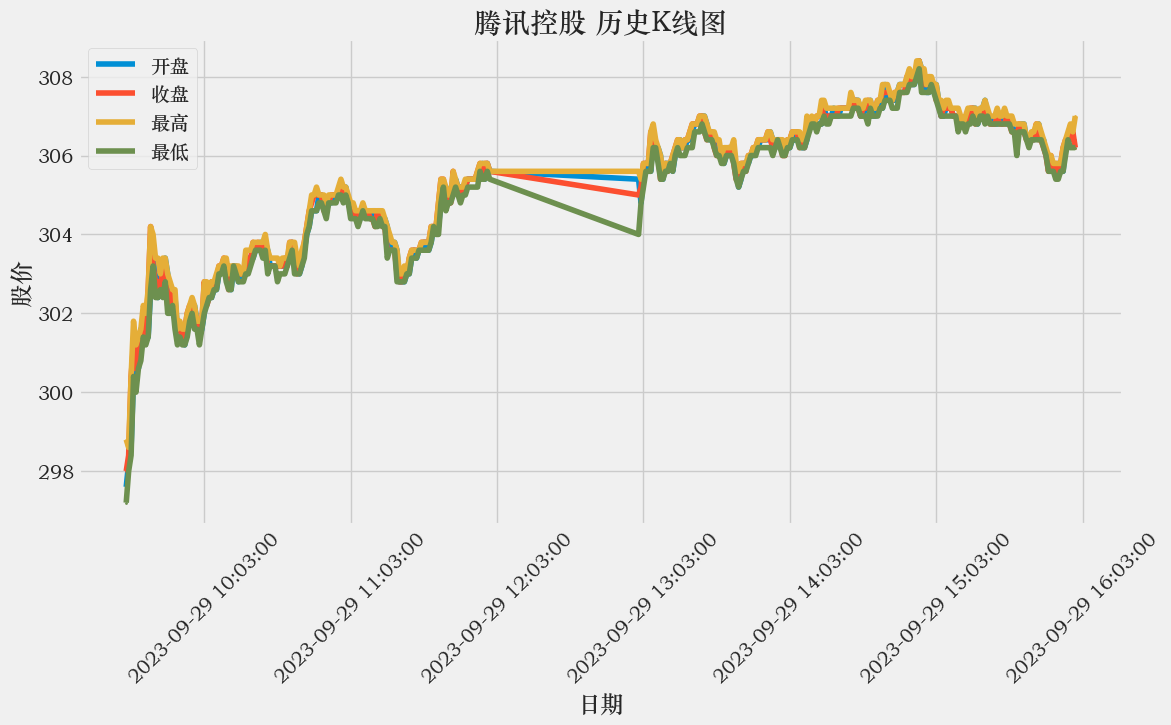

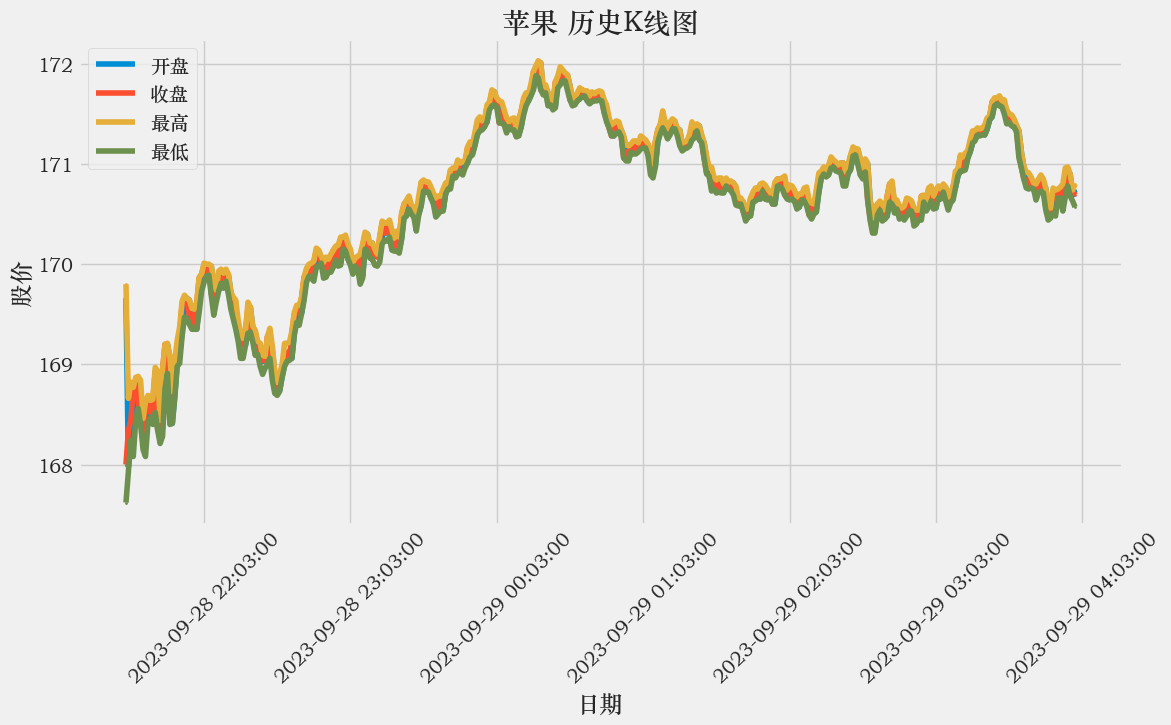

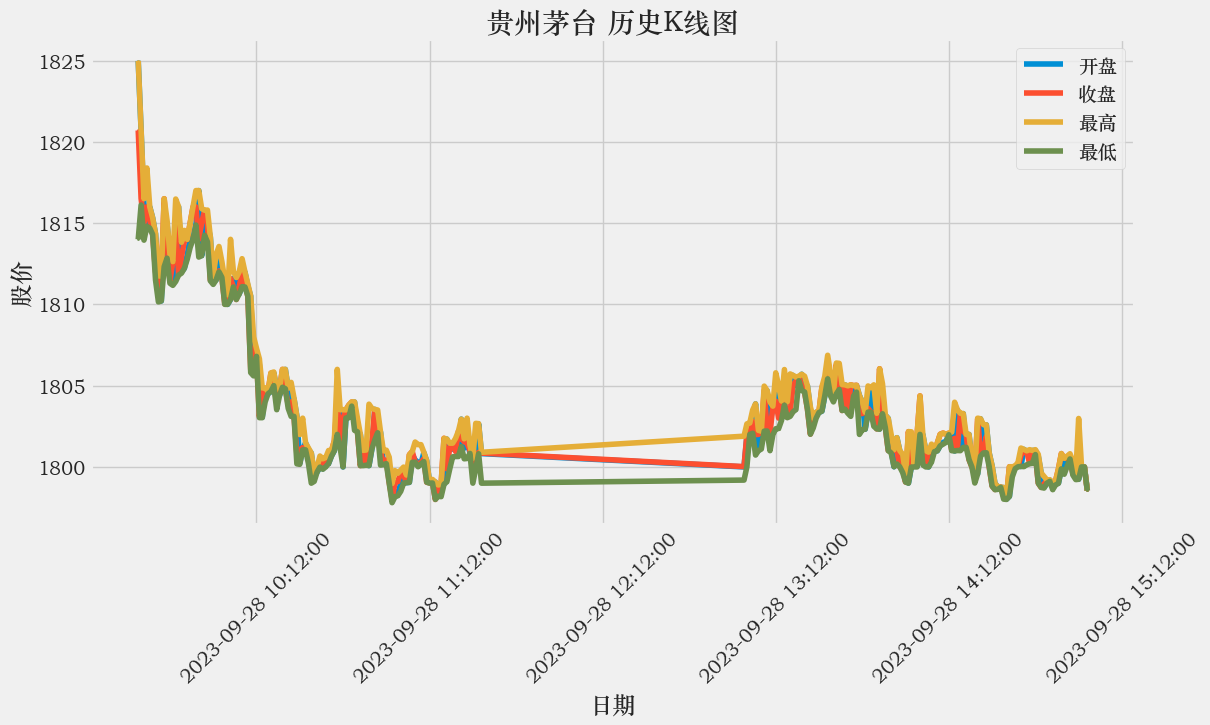

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MinuteLocator
from datetime import datetime
from pylab import mpl

# 设置中文字体
mpl.rcParams['font.sans-serif'] = ['STZhongsong']
mpl.rcParams['axes.unicode_minus'] = False

# 读取合并后的股票数据
stock_data = pd.read_csv("./combined_stock_data.csv")

# 按股票名称分组
grouped_data = stock_data.groupby('股票名称')

# 设置K线图的通用属性
def set_kline_plot_properties():
    plt.title(f'{name} 历史K线图')
    plt.xlabel('日期')
    plt.ylabel('股价')
    plt.xticks(rotation=45)
    plt.grid(True)

# 遍历每个股票分组，并创建K线图
for name, group in grouped_data:
    # 去除重复时间戳
    group = group.drop_duplicates(subset=['日期'])

    # 检查数据是否足够绘制
    if len(group) < 2:
        continue  # 如果数据少于2个数据点，跳过绘图

    plt.figure(figsize=(12, 6))
    set_kline_plot_properties()
    
    # 强制解析日期数据
    group['日期'] = group['日期'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))

    # 使用循环绘制K线图
    for column in ['开盘', '收盘', '最高', '最低']:
        plt.plot(group['日期'], group[column], label=column, linestyle='-', marker='o', markersize=1)
    
    plt.legend()

    # 设置日期刻度间隔为每隔一段时间显示一个日期
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(MinuteLocator(interval=60))  # 设置X轴刻度为每60分钟

    plt.show()


In [ ]:
# 直接输出会超出大小限制

# 使用groupby方法按照股票名称分组
grouped_data = stock_data.groupby('股票名称')
stock_codes = ['贵州茅台', '腾讯', 'AAPL']

# 创建一个空的DataFrame来存储描述性统计信息
summary_df = pd.DataFrame()

# 针对每个分组执行describe，并将结果添加到summary_df中
for stock_codes, group in grouped_data:
    summary = group.describe()
    summary['股票公司'] = stock_codes
    summary_df = pd.concat([summary_df, summary])

# 保存summary_df为CSV文件
summary_file_path = "stock_data_summary.csv"
summary_df.to_csv(summary_file_path, index=False)
